# Getting started

### Download and Install

Download the code from Github

`git clone https://github.com/computational-epigenetics-section/CpGMatrixPlotter.git`

Enter the directory

`cd CpGMatrixPlotter`

Install the package

`pip install .`

# Basic usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cpgPlotter import CpGMatrixPlotter


Each CpG region should be represented as a 2D numpy array of 1s and 0s. 1=methylated, 0=unmethylated

In [2]:
region = np.array([
    [1,1,1,1],
    [0,0,0,0],
    [1,1,0,0],
    [0,0,1,1],
    [1,1,1,1],
    [0,0,0,0],
])

Additionally, the positions of each CpG need to be represented as a 1D numpy array

In [3]:
locations = np.array([500,550,575,580])

In [4]:
# Create an instance of the plotter 
plotter = CpGMatrixPlotter()

To generate a tanghulu plot you need to call the `.plotCpGMatrix` method of the plotter object, and at a mimimum you need to pass the methylation state and location arrays as arguments.

This will generate a plot with the CpGs positioned with their distances used to generate proportional spacing between the CpG sites.

Usually this will look okay.

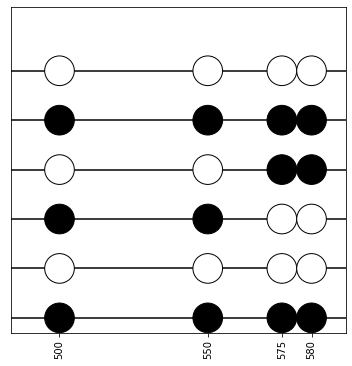

In [5]:
plotter.plotCpGMatrix(cpgMatrix=region, cpgPositions=locations)

This is really only scaled to work over a 100bp region. So this package will not work with windows larger than 100bp. It will need to be modified to make that work.

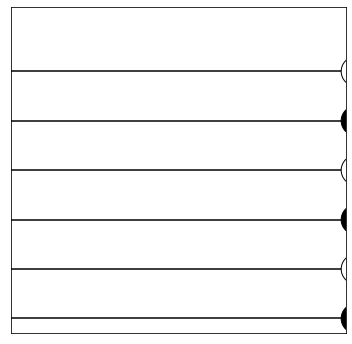

In [6]:
#### WILL NOT PLOT CORRECTLY ####
plotter.plotCpGMatrix(cpgMatrix=region, cpgPositions=np.array([400,550,575,580]))

The plotting package also works with regions with many numbers of reads, but can get small. This can be adjusted for by changing the plotting area size using the `figsize` options

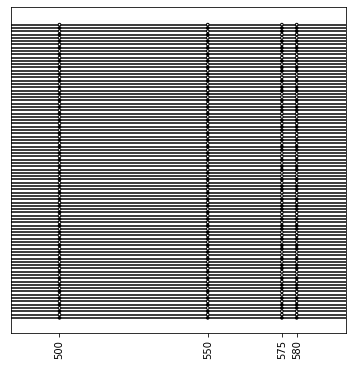

In [7]:
# Will plot with small circles
plotter.plotCpGMatrix(
    cpgMatrix=np.vstack([region for i in range(15)]), 
    cpgPositions=locations,    
)

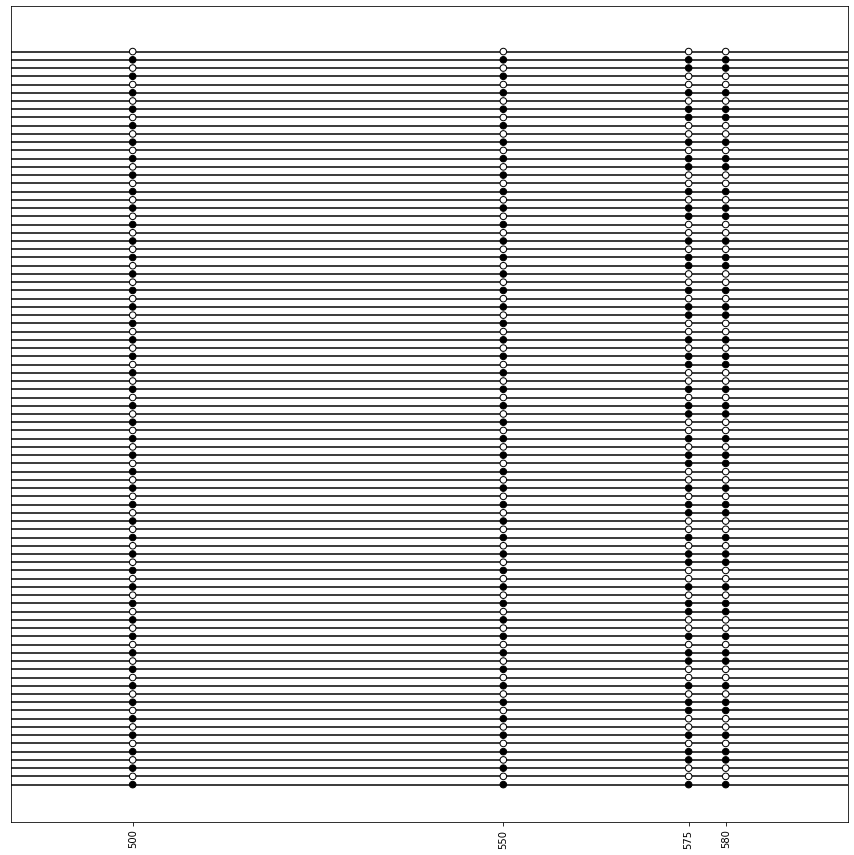

In [8]:
#Everything will be a little bigger and easier to see
plotter.plotCpGMatrix(
    cpgMatrix=np.vstack([region for i in range(15)]), 
    cpgPositions=locations,
    figsize=(15,15)
)

Other arguments can be passed to the plotting function to control the output


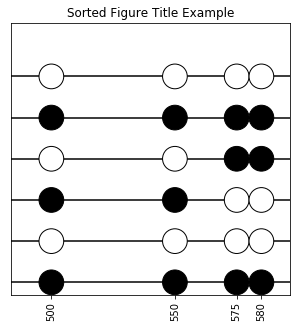

In [9]:
plotter.plotCpGMatrix(
    cpgMatrix=region, 
    cpgPositions=locations,
    title="Sorted Figure Title Example",
    figsize=(5,5),    
)

Additionally, you can use the `sort` argument to sort the reads by methylation level

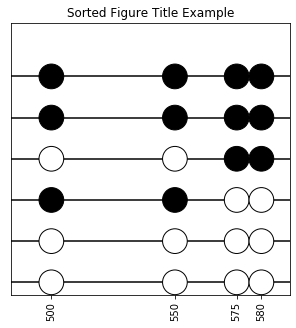

In [10]:
plotter.plotCpGMatrix(
    cpgMatrix=region, 
    cpgPositions=locations,
    title="Sorted Figure Title Example",
    figsize=(5,5),
    sort=True
    
)

Plots can be saved by using standard matplotlib saving syntax after the code

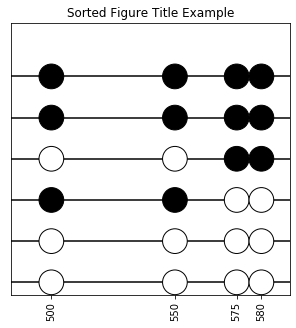

In [11]:
plotter.plotCpGMatrix(
    cpgMatrix=region, 
    cpgPositions=locations,
    title="Sorted Figure Title Example",
    figsize=(5,5),
    sort=True
    
)
plt.savefig("saved_tanghulu.png", dpi=150)

# Advanced usage

Select CpG sites can be highlighted in the plot. These parameters can be tuned during object instantiation


In [12]:
plotter2 = CpGMatrixPlotter(highlight_color="limegreen", highlight_linewidth=3)

By default nothing is different about this

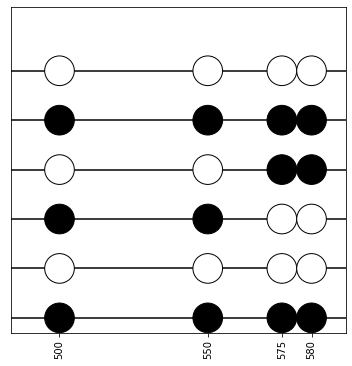

In [13]:
plotter2.plotCpGMatrix(cpgMatrix=region, cpgPositions=locations)

To highligh specific CpGs you need to pass a 1D array indicating if each CpG site should be highlighted. 0=No highlight, 1=highlight. The ordering should match the CpGs in your original 2D cpgMatrix array in a left-to-right, top-to-bottom direction.

For example we can highlight specific CpGs using the following:

In [14]:
# First, create it as a 2D array to easier visualize the position of each CpG
highlights = np.array([
    [0,0,0,0],
    [0,0,1,1],
    [0,0,1,1],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,1,1],
])

# Unravel this into a 1D array
high1D = highlights.ravel()
print(high1D)

[0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1]


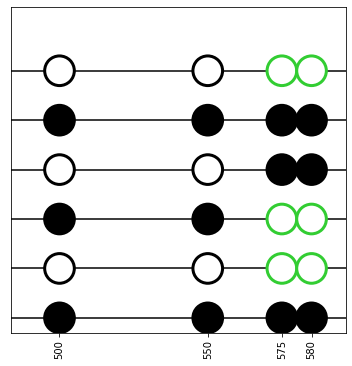

In [15]:
plotter2.plotCpGMatrix(cpgMatrix=region, cpgPositions=locations, highlights=high1D)

These highlights will correctly follow the CpGs during sorting as well

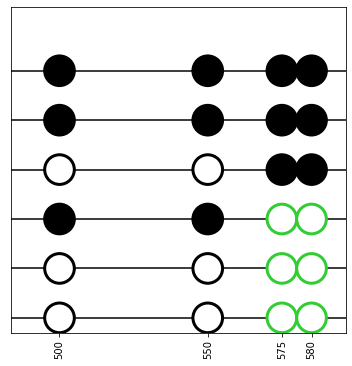

In [16]:
plotter2.plotCpGMatrix(cpgMatrix=region, cpgPositions=locations, highlights=high1D, sort=True)